# Correcting distortions
In a perfect world, lessons 1 and 2 would be sufficient to fully calibrate a camera.
However, due to lens imperfection and misalignment, we have to account for two type of distortion:
* radial distortion. With $x,y$ the coordinate of the distorted image, the corrected coordinates are:

$x_{corrected}=x(1+k_1*r^2+k_2*r^4+k_3*r^6)$

$y_{corrected}=y(1+k_1*r^2+k_2*r^4+k_3*r^6)$
* tangential distortion. With $x,y$ the coordinate of the distorted image, the corrected coordinates are:

$x_{corrected}=x+[2p_1xy+p_2(r^2+2x^2)]$

$y_{corrected}=y+[p_1(r^2+2y^2)+2p_2xy]$

## Exercice: code the radial and tangential distortion correction functions
Consider the center is at $(0,0)$. r is the radius.

In [1]:
def radialUndistort(x,y,k1,k2,k3):
    r=np.sqrt(np.square(x)+np.square(y))
    polyn=k1*np.square(r)+k2*np.power(r,4)+k3*np.power(r,6)
    xDistorted=x*(1+polyn)
    yDistorted=y*(1+polyn)
    return xDistorted,yDistorted

In [2]:
def tangentialUndistort(x,y,p1,p2):
    r=np.sqrt(np.square(x)+np.square(y))
    xDistorted=x+2*p1*x*y+p2*(np.square(r)+2*np.square(x))
    yDistorted=y+p1*(np.square(r)+2*np.square(y))+2*p2*x*y
    return xDistorted,yDistorted

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display

def showDistortionEffects(k1,k2,k3,p1,p2):
    Y,X=np.mgrid[-10:10:0.5,-10:10:0.5]
    U,V=radialUndistort(X,Y,k1,k2,k3)
    UTan,VTan=tangentialUndistort(X,Y,p1,p2)
    f=plt.figure()
    p1=f.add_subplot(121)
    p1.set_title("Radial undistortion")
    p1.quiver(X,Y,U,V,color='Teal',headlength=7)
    
    p2=f.add_subplot(122)
    p2.set_title("Tangential undistortion")
    p2.quiver(X,Y,UTan,VTan,color='Teal',headlength=7)
    
    plt.show()

C:\Users\jeremy_nicola\Documents\pyzo2014a\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


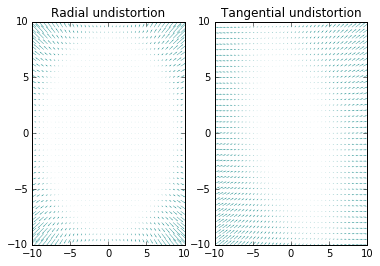

In [4]:
w=interactive(showDistortionEffects,k1=(0.,10.),k2=(0.,10.),k3=(0.,10.),p1=(0.,10.),p2=(0.,10.))
clear_output(wait=True)
display(w)